## Домашнее задание № 9
Работа с изображениями с целью аугментации. Необходимо:
1. Скачать изображения, на которых автомобили есть или нет. 100 изображений целевого класса и 100 нецелевого. Размер 256x256px.
2. Аугментация (вращение, растяжение/сжатие, увеличение/уменьшение). Количество изображений должно увеличиться минимум в 3 раза.
Библиотеки, необходимые для реализации домашнего задания: OpenCV, pillow, scikit-image, tf.image. 

In [1]:
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as pl
import random

In [2]:
path_tree = "C:\\Users\\User"
path_of_original_img = path_tree + "\\HW_images"
path_of_changed_images = path_tree + "\\HW_changed_images"

os.chdir(path_of_original_img)

list_of_row_images = os.listdir()
len(list_of_row_images)

217

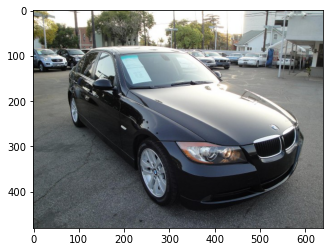

In [3]:
image = Image.open(list_of_row_images[0])
pl.imshow(image)

Вращение изображения на случайный угол

In [3]:
def rotation(img):
    image = Image.open(img)
    err_rot = random.randint(-90, 90)
    im_rotate = image.rotate(err_rot)
    return im_rotate

Пример вращения изображения на случайный угод с помощью функции rotation

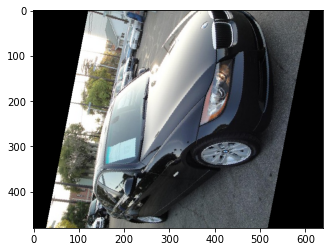

In [34]:
rotation_example = rotation(list_of_row_images[0])
pl.imshow(rotation_example)

Растяжение/сжатие изображения

In [4]:
def image_resize(img):
    image = Image.open(img)
    width, height = image.size
    w_coef = random.randint(1, width*2)
    h_coef = random.randint(1, height*2)
    im_resized = image.resize((w_coef, h_coef))
    return im_resized

Пример изменения ширины и длины картинки(растяжение/сжатие, увеличение/уменьшение)

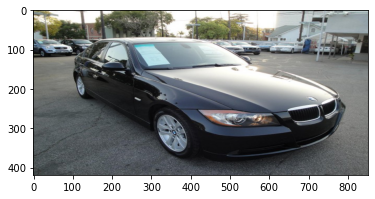

In [47]:
resize_example = image_resize(list_of_row_images[0])
pl.imshow(resize_example)

Изменение цвета изображения(негатив)

In [5]:
def redraw_image(img):
    image = Image.open(img)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()
    for i in range(width):
        for j in range(height):
            a = pix[i, j][0]
            b = pix[i, j][1]
            c = pix[i, j][2]
            draw.point((i, j), (255 - a, 255 - b, 255 - c))
    return image

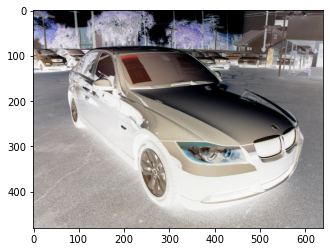

In [46]:
redraw_image_example = redraw_image(list_of_row_images[0])
pl.imshow(redraw_image_example)

Используем описанные выше функции для аугментации всех изначальных изображений. Измененные изображения будут храниться в отдельной папке HW_channged_image

In [13]:
image_counter = 0

for img in list_of_row_images:
    os.chdir(path_of_original_img)
    
    origin_image = Image.open(img)
    rotate_image = rotation(img)
    resized_image = image_resize(img)
    redrown_image = redraw_image(img)
    
    os.chdir(path_of_changed_images)
    
    rotate_image.save(path_of_changed_images +f"\{image_counter}_rotate_im.jpg")
    resized_image.save(path_of_changed_images +f"\{image_counter}_resized_im.jpg")
    redrown_image.save(path_of_changed_images +f"\{image_counter}_redrawn_im.jpg")
    image_counter += 1

Выведем число измененных изображений в папке HW_channged_image

In [14]:
list_of_changed_images = os.listdir()
len(list_of_changed_images)

651